<a href="https://colab.research.google.com/github/VanshR04/Pytorch/blob/main/torch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import torch
from torch import nn #nn contains all of pytorch building blocks for neural networks
import matplotlib.pyplot as plt

In [59]:
!nvidia-smi

Sun Feb  2 00:51:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [60]:
torch.__version__

'2.5.1+cu124'

###Preparing and loading **DATA**

Data is almost anything (text, excel, images, videos, audio, dna)

**ML** requires to get data into numerical representation -> build a model to learn patterns in the numerical representations

In [61]:
# known parameters

weight = 0.7
bias = 0.3

In [62]:
X = torch.arange(0,1,0.02).unsqueeze(dim = 1)
y = weight*X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

###Splitting Data into training and testing datasets

###**GENERALISATION** -> Ability of machine to perform well on data it has not seen or trained on

In [63]:
X_train, y_train = X[:40], y[:40]
X_test, y_test = X[40:], y[40:]

In [64]:
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

##Visualizing data

In [65]:
def visualize(train = X_train, labels = y_train, test = X_test, label_test = y_test, predictions = None):
  plt.figure(figsize = (10,7))
  plt.scatter(train, labels, c ="b", s = 4, label = "Training data")
  plt.scatter(test, label_test, c ="g", s = 4, label = "Test Data")

  if predictions is not None:
    plt.scatter(test, predictions, c = "r", s = 4, label = "Predictions")
    plt.legend(prop = {"size" : 14})

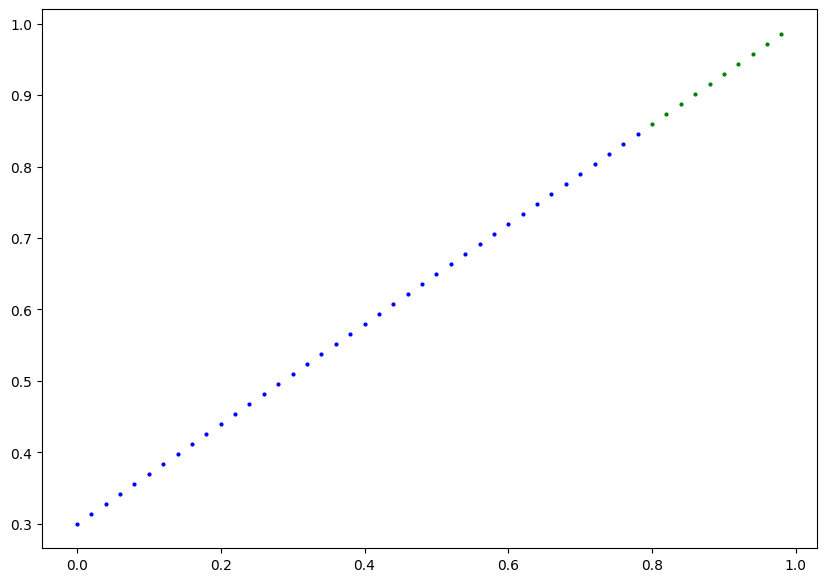

In [66]:
visualize()

###Build the first PyTorch model

In [67]:
#create linear regression model class
from torch import nn
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()#super constructor
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

  #forward method to define computation of model
  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.weights*x + self.bias #linear regression formula

###Adjust weights by :

##1.) Back propagation
##2.) Gradient Descent

In [68]:
torch.manual_seed(42)
model = LinearRegressionModel()

In [69]:
list(model.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [70]:
model.state_dict() #TELLS ABOUT PARAMETERS WITH NAMES AND VALUES

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

##Make predictions with 'torch.inference_mode()'

In [71]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [72]:
with torch.inference_mode():
  y_pred_1 = model(X_test)

y_pred_1

with torch.no_grad():
  y_pred = model(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

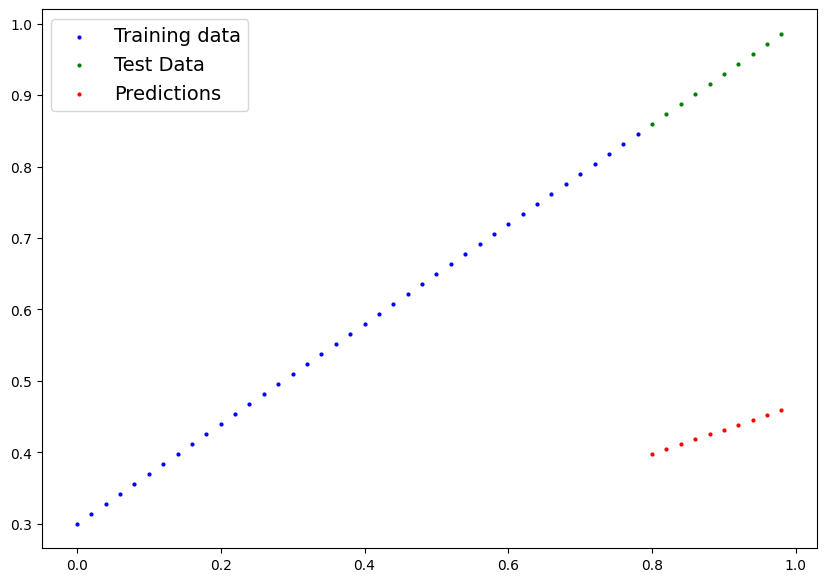

In [73]:
visualize(predictions=y_pred_1)

###Training sample model

In [74]:
loss = nn.L1Loss()
loss

L1Loss()

In [75]:
from torch import optim

In [76]:
optimizer = optim.SGD(model.parameters(), lr=0.005) #stochastic gradient descent

###Training loop + Testing loop

##A **Hyperparameter** is a parameter that we as data-scientists set ourselves, for eg.: learning rate, number of epochs

In [77]:
epochs = 1000

hist = []
epo = []
te = []
for epoch in range(epochs+1):
  model.train()#train mode sets parameters to require gradients to help with optimization
  y_pred = model(X_train)
  loss_val = loss(y_pred, y_train)
  hist.append(loss_val)
  optimizer.zero_grad() #basically resetting optimizer for each loop, setting gradients to 0

  #perform backpropagation on the loss with respect to parameters
  loss_val.backward()#perform backpropagation to perform the gradient of every parameter
  optimizer.step() #perform gradient descent and change values of parameters to optimize
  model.eval()

  with torch.inference_mode():
    test_pred = model(X_test)
    loss_test = loss(test_pred, y_test)
  if epoch%10 == 0:
    epo.append(epoch)
    hist.append(loss)
    te.append(loss_test)
    print(f"Epoch : {epoch} | Loss : {loss_val} | Test Loss : {loss_test}")

Epoch : 0 | Loss : 0.31288138031959534 | Test Loss : 0.4878006875514984
Epoch : 10 | Loss : 0.2552763819694519 | Test Loss : 0.4204457700252533
Epoch : 20 | Loss : 0.19767148792743683 | Test Loss : 0.3530908524990082
Epoch : 30 | Loss : 0.14006651937961578 | Test Loss : 0.28573593497276306
Epoch : 40 | Loss : 0.08927296102046967 | Test Loss : 0.22298328578472137
Epoch : 50 | Loss : 0.06430868804454803 | Test Loss : 0.1780700981616974
Epoch : 60 | Loss : 0.05326785519719124 | Test Loss : 0.14764074981212616
Epoch : 70 | Loss : 0.048239972442388535 | Test Loss : 0.1278875768184662
Epoch : 80 | Loss : 0.0454358235001564 | Test Loss : 0.11465175449848175
Epoch : 90 | Loss : 0.04341598600149155 | Test Loss : 0.10575185716152191
Epoch : 100 | Loss : 0.041651852428913116 | Test Loss : 0.10024197399616241
Epoch : 110 | Loss : 0.03990685194730759 | Test Loss : 0.0947321355342865
Epoch : 120 | Loss : 0.03816189616918564 | Test Loss : 0.0892225131392479
Epoch : 130 | Loss : 0.03643612936139107 | 

In [78]:
list(model.parameters())

[Parameter containing:
 tensor([0.6974], requires_grad=True),
 Parameter containing:
 tensor([0.3048], requires_grad=True)]

In [79]:
with torch.inference_mode():
  y_pred = model(X_test)

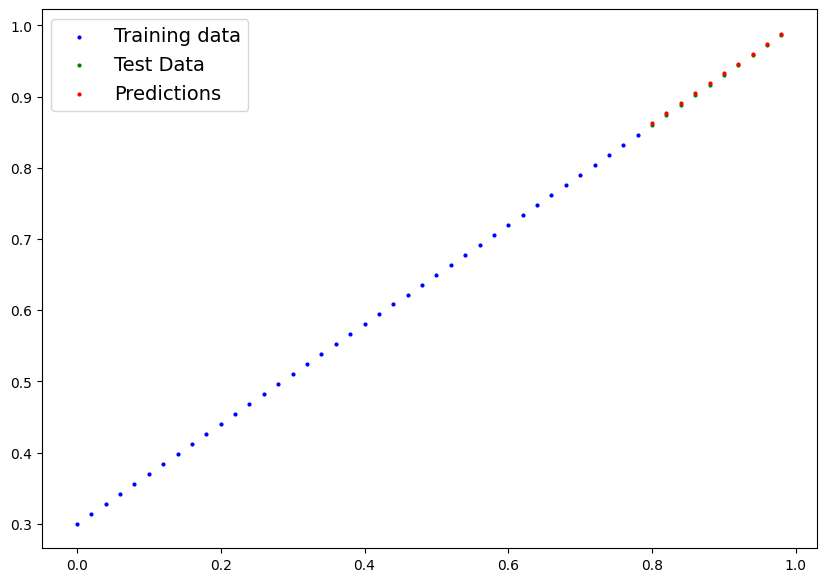

In [80]:
visualize(predictions=y_pred)